In [14]:
import torch
from torchvision.transforms import functional

print(torch.cuda.is_available())

True


In [2]:
ckpt = torch.load("./ckpt/FFHQ_256.pt")

print(ckpt.keys())

dict_keys(['g', 'd', 'g_ema', 'g_optim', 'd_optim', 'args'])


In [3]:
import os
os.add_dll_directory("C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\v11.7\\bin")

from models.generator import *

G = Generator(256,512,8).to("cuda")
G.load_state_dict(ckpt["g_ema"])

C:\Users\PublicF\anaconda3\envs\stylegan3\lib\site-packages\torch\functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


<All keys matched successfully>

In [34]:
with torch.no_grad():
    noise = torch.rand(4,512).to("cuda")
    
    image, latent = G(noise, return_latents=True)

### Wrong RGB

if dircetly call to_pil_image(image), it can cause wrong rgb

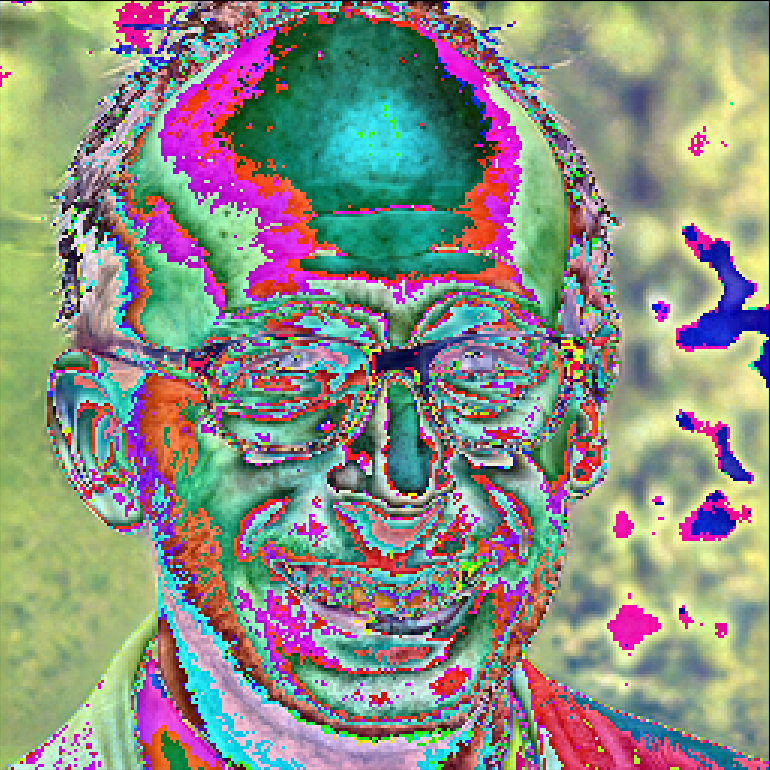

the solution is from the answer of this stackoverflow post:
https://stackoverflow.com/questions/47318871/valueerror-floating-point-image-rgb-values-must-be-in-the-0-1-range-while-usi

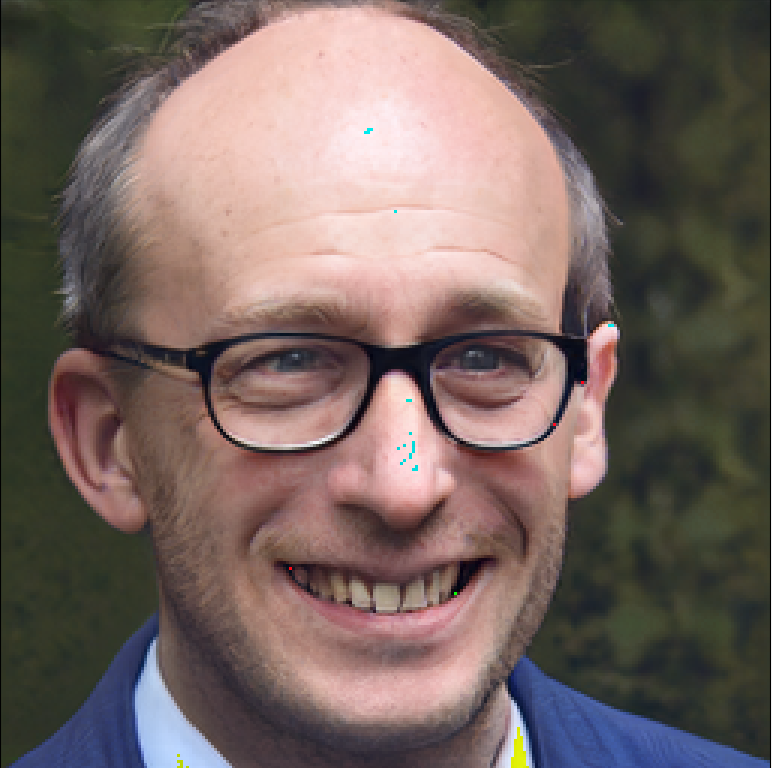

we can see there's still something wrong, so i change 2.25 to around 2.8

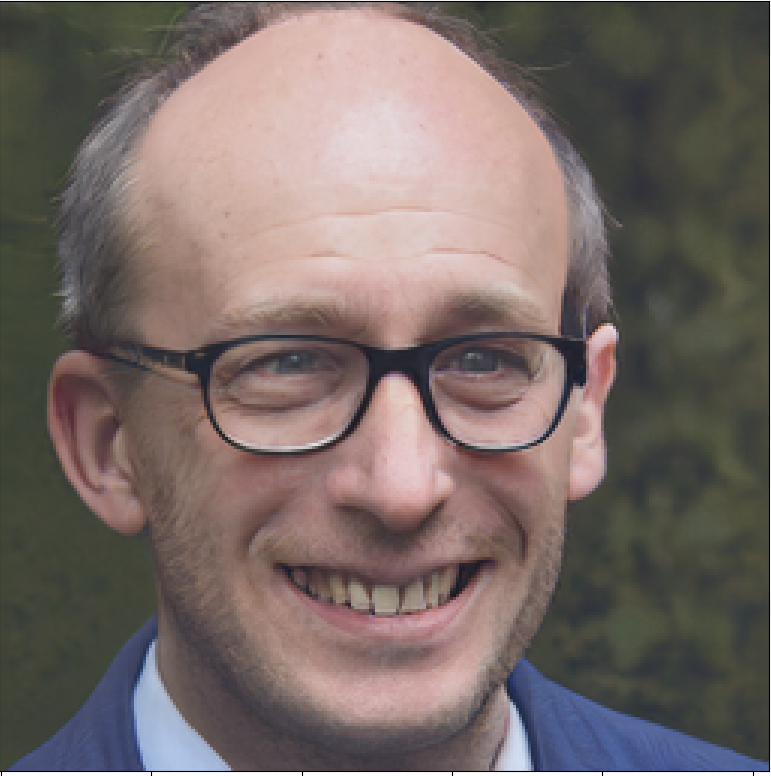

and solve the problems

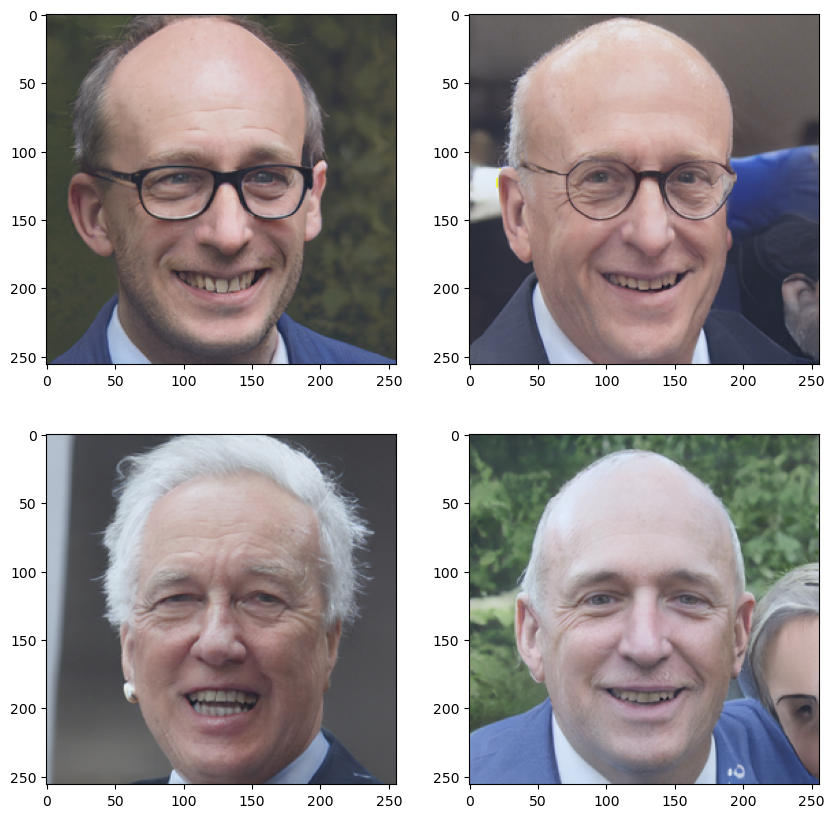

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

for i in range(2):
    for j in range(2):
        img = (1/(2*2.8)) * image[0][2*i+j].permute(1,2,0).cpu().numpy() + 0.5
        img = functional.to_pil_image(img , mode="RGB")
        plt.subplot(2,2,2*i+j+1)
        plt.imshow(img)

plt.show()

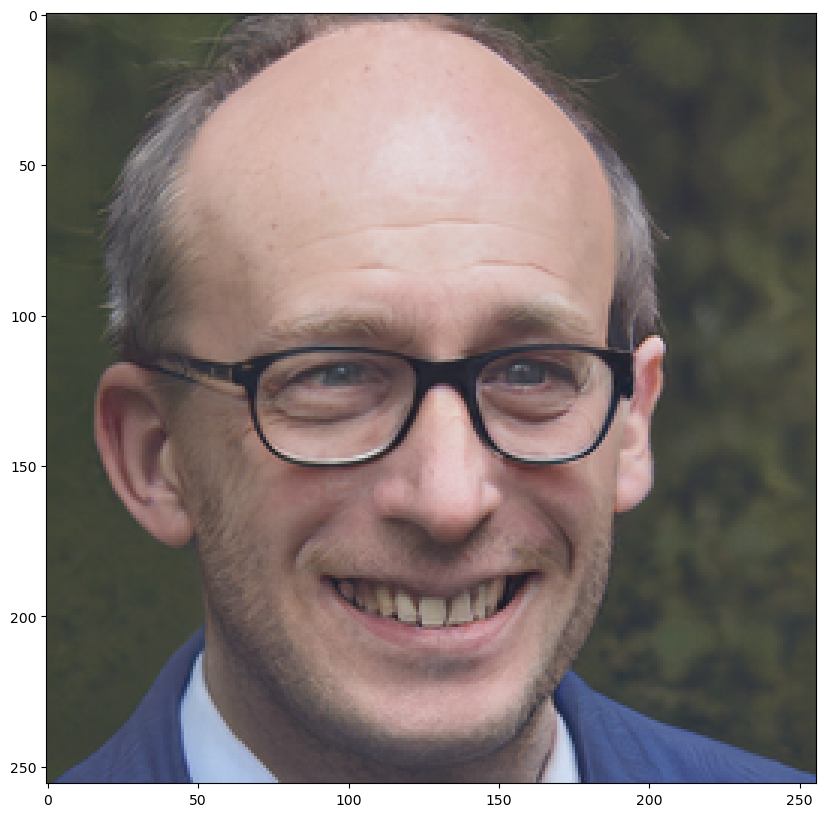

In [49]:
import matplotlib.pyplot as plt
img = (1/(2*2.8)) * image[0][0].permute(1,2,0).cpu().numpy() + 0.5
img = functional.to_pil_image(img , mode="RGB")

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [54]:
from torch import optim

G_opt = optim.Adam(
        G.parameters(),
        lr=2e-3,
        betas=(0, 0),
    )
G_opt.load_state_dict(ckpt["g_optim"])
G_opt.zero_grad()